In [1]:
import os
from Bio import SeqIO
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
myfiles = [x for x in os.listdir() if x.startswith("ALL")]
myfiles

['ALL_V_human.fasta', 'ALL_J_human.fasta', 'ALL_C_human.fasta']

In [3]:
alleles = list()
genes = list()
genetypes = list()
sequences = list()
lengths = list()
for myfile in myfiles:
    for record in SeqIO.parse(open(myfile), "fasta"):
        allele = record.id.split("|")[1]
        alleles.append(allele)
        gene = allele.split("*")[0]
        genes.append(gene)
        genetype = re.split("\d", gene)[0]
        genetypes.append(genetype)
        sequences.append(str(record.seq))
        lengths.append(len(record.seq))

In [4]:
df = pd.DataFrame({'genetype': genetypes, 'gene': genes, 'allele': alleles, 'length': lengths, 'sequence': sequences})
df.head()

,genetype,gene,allele,length,sequence
0,IGHV,IGHV1-18,IGHV1-18*01,296,caggttcagctggtgcagtctggagctgaggtgaagaagcctgggg...
1,IGHV,IGHV1-18,IGHV1-18*02,276,caggttcagctggtgcagtctggagctgaggtgaagaagcctgggg...
2,IGHV,IGHV1-18,IGHV1-18*03,296,caggttcagctggtgcagtctggagctgaggtgaagaagcctgggg...
3,IGHV,IGHV1-18,IGHV1-18*04,296,caggttcagctggtgcagtctggagctgaggtgaagaagcctgggg...
4,IGHV,IGHV1-2,IGHV1-2*01,296,caggtgcagctggtgcagtctggggctgaggtgaagaagcctgggg...


In [5]:
df['genetype'].unique()

array(['IGHV', 'IGKV', 'IGLV', 'TRAV', 'TRBV', 'TRDV', 'TRGV', 'TRGVA',
       'VPREB', 'IGHJ', 'IGKJ', 'IGLJ', 'TRAJ', 'TRBJ', 'TRDJ', 'TRGJ',
       'TRGJP', 'IGHA', 'IGHD', 'IGHE', 'IGHG', 'IGHGP', 'IGHM', 'IGKC',
       'IGLC', 'IGLJ-C/OR', 'TRAC', 'TRBC', 'TRDC', 'TRGC'], dtype=object)

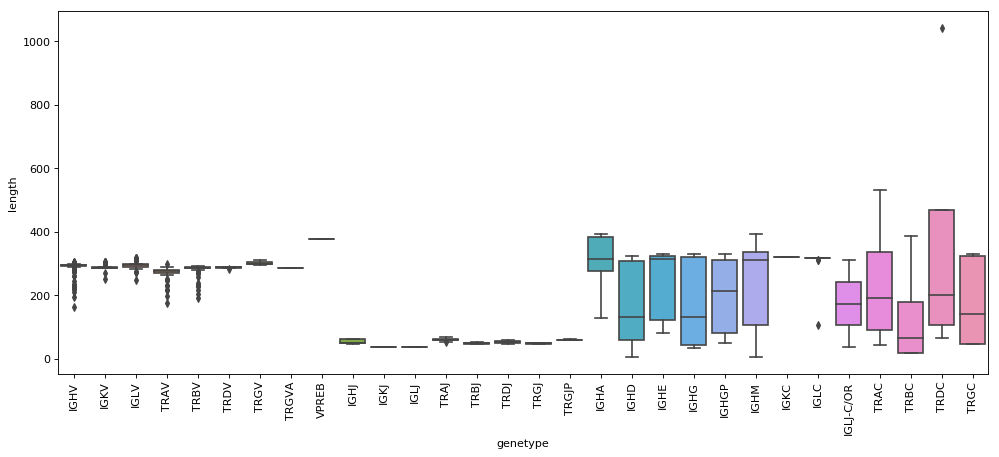

In [6]:
plt.figure(figsize=(15, 6), dpi=80)
ax = sns.boxplot(x='genetype', y='length', data=df)
plt.setp(ax.get_xticklabels(), rotation=90)
plt.show()

In [7]:
df.groupby("genetype").agg({'length': [np.mean, np.median]})

length       
                 mean median
genetype                    
IGHA       310.388889  313.5
IGHD       164.750000  131.0
IGHE       248.000000  315.0
IGHG       181.768844  132.0
IGHGP      196.100000  213.0
IGHJ        53.923077   51.0
IGHM       222.375000  312.0
IGHV       292.071225  296.0
IGKC       321.000000  321.0
IGKJ        38.333333   38.0
IGKV       290.194444  287.0
IGLC       300.769231  318.0
IGLJ        38.000000   38.0
IGLJ-C/OR  174.500000  174.5
IGLV       296.065934  297.0
TRAC       239.500000  190.5
TRAJ        60.897059   61.0
TRAV       271.300971  276.0
TRBC       133.500000   66.0
TRBJ        49.625000   50.0
TRBV       282.387324  287.0
TRDC       377.250000  200.0
TRDJ        53.000000   52.5
TRDV       287.666667  288.0
TRGC       151.260870  141.0
TRGJ        49.000000   50.0
TRGJP       60.666667   60.0
TRGV       302.470588  300.0
TRGVA      285.000000  285.0
VPREB      378.000000  378.0